# Moses Permaul - IS362 - Project 3
Your assignment involves combining information from a number of SQL tables, then displaying the information in a pandas DataFrame.

For your relational database management system, you may use any RDBMS, including MySQL, PostgreSQL, sqlite, or any of the other RDMBSs supported by the database in Step 1 below.
1. For your database, you should download and install the appropriate version of the Chinook database for your RDBMS, which is available here, under the downloads tab: https://chinookdatabase.codeplex.com/
2. Your task is to create a pandas DataFrame that displays Customers’ Last Name and First Name, and each customer’s purchased Track names and Album Titles. The information should be sorted by Customer LastName then Customer FirstName. The first five rows of your results should look like this:

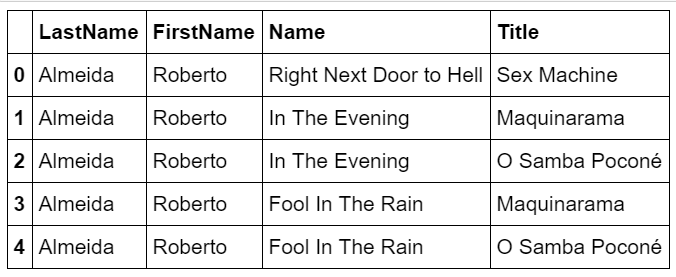


### Python Code for Imports and Reading the Data
We will import the standard libraries needed, read in the data from a sqlite database file, and display the first 5 rows from the DataFrame.

In [1]:
# standard imports for pandas and sqlalchemy
import pandas as pd
import sqlalchemy as sqla

# sql query
sql = '''
    SELECT
        t1.LastName,
        t1.FirstName, 
        t4.Name,
        t5.Title
    FROM customer t1
    LEFT JOIN invoice t2 
        ON t1.CustomerId = t2.CustomerId
    LEFT JOIN invoiceline t3
        ON t2.InvoiceId = t3.InvoiceId
    LEFT JOIN track t4
        ON t3.TrackId = t4.TrackId
    LEFT JOIN album t5
        ON t4.AlbumId = t5.AlbumId
    ORDER BY t1.LastName, t1.FirstName;'''

# create database engine
db = sqla.create_engine('sqlite:///data/Chinook_Sqlite.sqlite')

# read sql database into DataFrame
df = pd.read_sql(sql, db)

#view first 5 rows
df.head()

,LastName,FirstName,Name,Title
0,Almeida,Roberto,Right Next Door to Hell,Use Your Illusion I
1,Almeida,Roberto,In The Evening,In Through The Out Door
2,Almeida,Roberto,Fool In The Rain,In Through The Out Door
3,Almeida,Roberto,Saudade Dos Aviões Da Panair (Conversando No Bar),Minas
4,Almeida,Roberto,Caso Você Queira Saber,Minas
